In [25]:
import warnings
warnings.filterwarnings('ignore')

# 손글씨 인식

In [26]:
from tensorflow import keras
(train_input,train_target),(test_input,test_target) = keras.datasets.mnist.load_data()

In [27]:
print(train_input.shape,train_target.shape)

(60000, 28, 28) (60000,)


In [28]:
print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [29]:
train_target[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

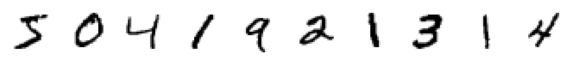

In [30]:
# train_input
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [31]:
#train_target의 종류 및 갯수 파악
import numpy as np
np.unique(train_target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [32]:
# 2차 행렬 만들기, 데이터 표준화
train_scaled = train_input /255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [33]:
# Train data를 훈련데이터와 검증데이터로 나누기
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target = \
    train_test_split(train_scaled,train_target,test_size=0.2,random_state=42
    )

In [34]:
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model = keras.Sequential(dense)

In [35]:
# 손실함수
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [36]:
model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4705 - accuracy: 0.8744
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3103 - accuracy: 0.9136
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2936 - accuracy: 0.9196
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2865 - accuracy: 0.9224
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2825 - accuracy: 0.9241
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2795 - accuracy: 0.9256
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2780 - accuracy: 0.9270
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2775 - accuracy: 0.9282
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2763 - accuracy: 0.9281
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.276